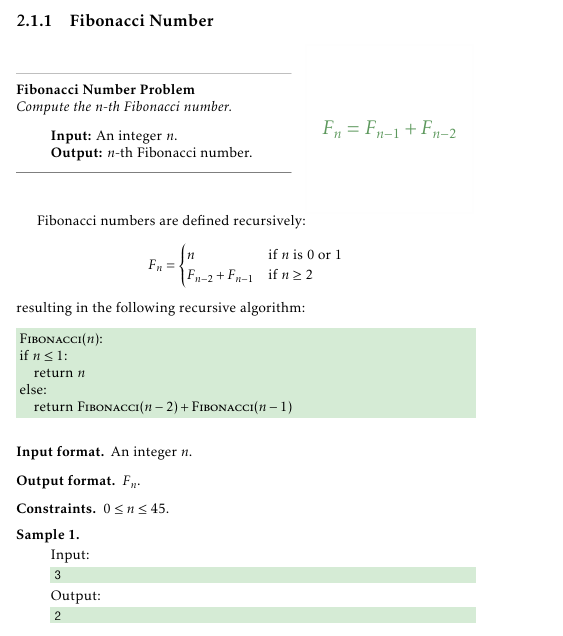
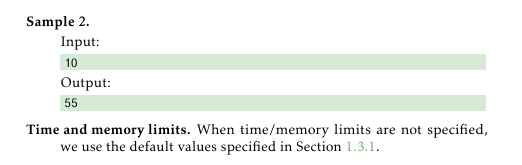

In [2]:
# Recursive Approach
def Fibonacci(n):
    if n <= 1:
        return n
    else:
        return Fibonacci(n - 2) + Fibonacci(n - 1)
    
# Eample    
n= 3
print(Fibonacci(n))

# Eample    
n= 10
print(Fibonacci(n))


2
55


**Time Complexity:**

The time complexity of this solution is O(2^n). This is because for each Fibonacci calculation, we perform two recursive calls (one for F(n-1) and one for F(n-2)), leading to exponential growth in the number of function calls.

Exponential Growth: For large values of n, this results in a large number of redundant function calls. Specifically, each call to F(n) results in two calls to F(n-1) and F(n-2), and so on.
Thus, the time complexity of the recursive solution is O(2^n).

**Space Complexity:**

The space complexity is O(n) because the recursive calls are stacked in the function call stack. At any point, the recursion will reach a depth of n, and each recursive call consumes space on the stack. Therefore, the space complexity is proportional to the depth of the recursion, which is n.

In [4]:
# Optimized Solution: Using Memoization (Dynamic Programming)

def Fibonacci(n, memo={}):
    if n <= 1:
        return n
    if n not in memo:
        memo[n] = Fibonacci(n - 1, memo) + Fibonacci(n - 2, memo)
    return memo[n]


# Eample    
n= 3
print(Fibonacci(n))

# Eample    
n= 10
print(Fibonacci(n))


2
55


**Time Complexity (Optimized):**

With memoization, the time complexity reduces to O(n) because we only compute each Fibonacci number once and store it in the memo dictionary. Each Fibonacci number is computed once and reused, which eliminates the exponential growth of recursive calls.

**Space Complexity (Optimized):**

The space complexity is O(n) due to the storage of the memoization results in the memo dictionary, in addition to the call stack (which still has a depth of n in the worst case).

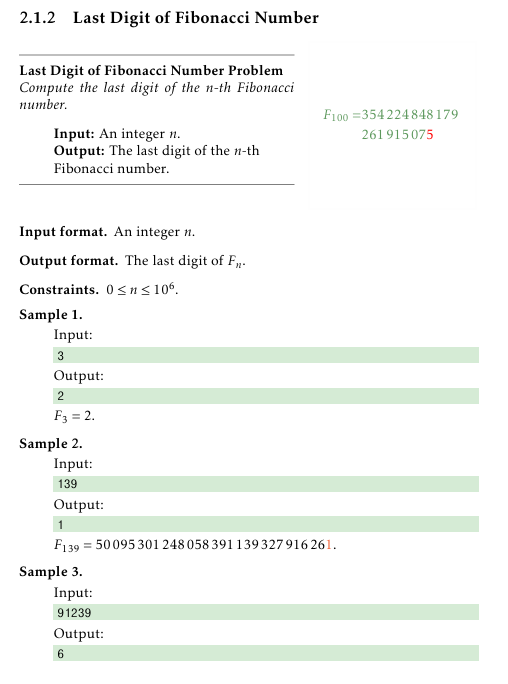

In [5]:
def last_digit_of_fibonacci(n):
    # Pisano period for modulo 10 is 60
    pisano_period = 60
    
    # Find the position of Fibonacci number in the cycle
    n = n % pisano_period
    
    # Initialize the first two Fibonacci numbers
    fib = [0, 1]
    
    # Generate the Fibonacci sequence modulo 10
    for i in range(2, n + 1):
        fib.append((fib[i - 1] + fib[i - 2]) % 10)
    
    return fib[n]

# Test cases
test_cases = [3, 100, 139, 91239]

# Output the result for each test case
for n in test_cases:
    print(f"Last digit of Fibonacci({n}) = {last_digit_of_fibonacci(n)}")


Last digit of Fibonacci(3) = 2
Last digit of Fibonacci(100) = 5
Last digit of Fibonacci(139) = 1
Last digit of Fibonacci(91239) = 6


**Time Complexity:**

Time Complexity: The time complexity of this approach is O(n) where n is the reduced index (n % 60). Since the Pisano period for modulo 10 is 60, the maximum number of Fibonacci numbers we need to compute is 60, making this approach very efficient.

**Space Complexity:**
 
The space complexity is O(1) because we only store a small number of Fibonacci numbers (up to 60).

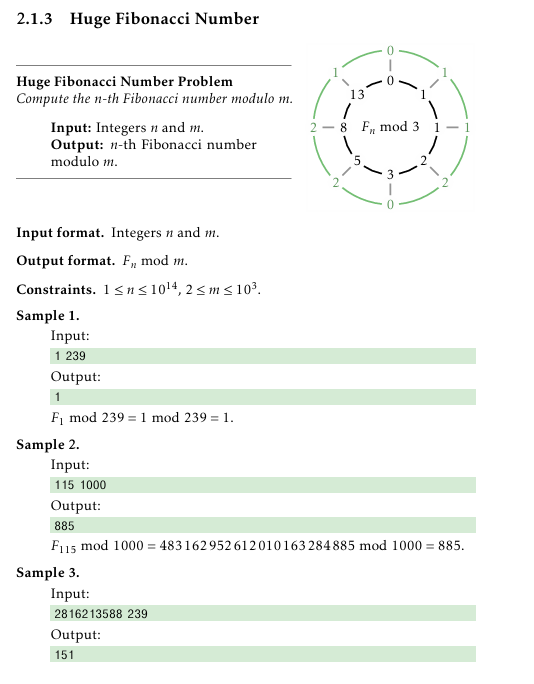

In [6]:
def matrix_mult(A, B, m):
    """Multiplies two 2x2 matrices A and B under modulo m."""
    return [
        [(A[0][0] * B[0][0] + A[0][1] * B[1][0]) % m, (A[0][0] * B[0][1] + A[0][1] * B[1][1]) % m],
        [(A[1][0] * B[0][0] + A[1][1] * B[1][0]) % m, (A[1][0] * B[0][1] + A[1][1] * B[1][1]) % m]
    ]

def matrix_pow(M, power, m):
    """Performs matrix exponentiation M^power under modulo m."""
    result = [[1, 0], [0, 1]]  # Identity matrix
    base = M
    
    while power > 0:
        if power % 2 == 1:
            result = matrix_mult(result, base, m)
        base = matrix_mult(base, base, m)
        power //= 2
    
    return result

def fibonacci_mod(n, m):
    """Returns F(n) % m using matrix exponentiation."""
    if n == 0:
        return 0
    elif n == 1:
        return 1
    
    # Fibonacci matrix
    F = [[1, 1], [1, 0]]
    
    # Exponentiate the matrix to (n-1)th power
    result = matrix_pow(F, n - 1, m)
    
    # The result is in the position [0][0] of the matrix
    return result[0][0]

# Test cases
test_cases = [(1, 239), (115, 1000), (2816213588, 239)]

# Output the result for each test case
for n, m in test_cases:
    print(f"F({n}) mod {m} = {fibonacci_mod(n, m)}")


F(1) mod 239 = 1
F(115) mod 1000 = 885
F(2816213588) mod 239 = 151


**Time Complexity:**

Matrix Multiplication: The matrix multiplication takes constant time, 
𝑂
(
1
)
, since we're always working with 2x2 matrices.
Matrix Exponentiation: The exponentiation is done in 
𝑂
(
log⁡
𝑛
)
time due to the binary exponentiation method.
Therefore, the overall time complexity is 
𝑂
(
log⁡
𝑛
).

**Space Complexity:**

Space Complexity: The space complexity is 
𝑂
(
1
)
, as we're only storing a constant amount of data (2x2 matrices and scalar values).

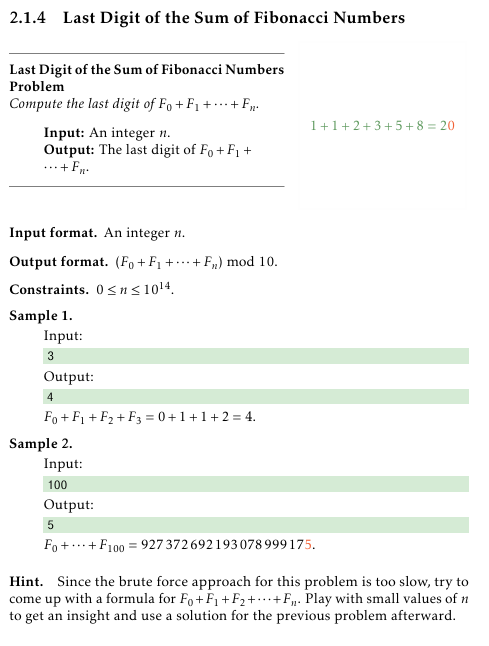

In [7]:
def fibonacci_mod(n, m):
    """Returns the n-th Fibonacci number modulo m using the Pisano period."""
    # Pisano period for modulo 10
    pisano_period = 60
    
    # Reduce n+2 modulo 60 to use the Pisano period
    n = (n + 2) % pisano_period
    
    # Base cases
    if n == 0:
        return 0
    elif n == 1:
        return 1
    
    # Calculate the n-th Fibonacci number modulo m
    prev, curr = 0, 1
    for _ in range(2, n + 1):
        prev, curr = curr, (prev + curr) % m
    return curr

def last_digit_of_fibonacci_sum(n):
    """Returns the last digit of the sum F0 + F1 + ... + Fn."""
    # Fibonacci sum formula: (F0 + F1 + ... + Fn) % 10 = (F(n+2) - 1) % 10
    fibonacci_n_plus_2 = fibonacci_mod(n, 10)
    return (fibonacci_n_plus_2 - 1) % 10

# Test cases
test_cases = [3, 100, 1000000000000000]

for n in test_cases:
    print(f"Last digit of sum of Fibonacci numbers up to F({n}): {last_digit_of_fibonacci_sum(n)}")


Last digit of sum of Fibonacci numbers up to F(3): 4
Last digit of sum of Fibonacci numbers up to F(100): 5
Last digit of sum of Fibonacci numbers up to F(1000000000000000): 5


**Time Complexity:**

Fibonacci Calculation: The Fibonacci number modulo 
𝑚
is computed in 
𝑂
(
min⁡
(
𝑛
,
Pisano period length
)
)
. Since the Pisano period modulo 10 is 60, the time complexity is 
𝑂
(
60
)
, which is constant.

Final Calculation: The subtraction and modulo operations are constant time operations.

Thus, the overall time complexity is O(1) for each test case.

**Space Complexity:**

Space Complexity: The space complexity is 
𝑂
(
1
)
, as we are using a constant amount of space for calculations.

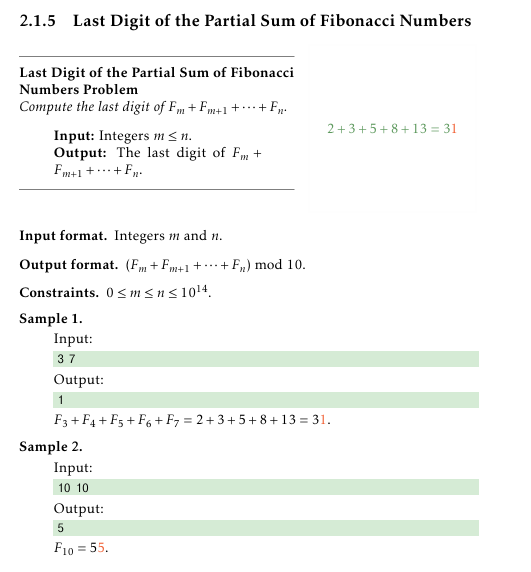

In [10]:
def fibonacci_mod(n, mod):
    # Base cases
    if n <= 1:
        return n
    # Matrix exponentiation
    def matrix_mult(A, B, mod):
        return [[(A[0][0] * B[0][0] + A[0][1] * B[1][0]) % mod,
                 (A[0][0] * B[0][1] + A[0][1] * B[1][1]) % mod],
                [(A[1][0] * B[0][0] + A[1][1] * B[1][0]) % mod,
                 (A[1][0] * B[0][1] + A[1][1] * B[1][1]) % mod]]

    def matrix_pow(M, p, mod):
        result = [[1, 0], [0, 1]]  # Identity matrix
        base = M
        while p:
            if p % 2:
                result = matrix_mult(result, base, mod)
            base = matrix_mult(base, base, mod)
            p //= 2
        return result

    # Transformation matrix for Fibonacci sequence
    F = [[1, 1], [1, 0]]
    result = matrix_pow(F, n - 1, mod)
    return result[0][0]  # F(n) is in the top-left corner of the result matrix

def partial_fibonacci_sum(m, n):
    # Pisano period for mod 10 is 60
    pisano_period = 60
    m %= pisano_period
    n %= pisano_period

    # Compute F(n+2) and F(m+1) mod 10
    fn_plus_2 = fibonacci_mod(n + 2, 10)
    fm_plus_1 = fibonacci_mod(m + 1, 10)

    # Compute the result modulo 10
    result = (fn_plus_2 - fm_plus_1) % 10
    return result

# Example Usage:
m, n = 3, 7
print(partial_fibonacci_sum(m, n))  # Output: 1

m, n = 10, 10
print(partial_fibonacci_sum(m, n))  # Output: 5


1
5


**Time Complexity:**
Matrix Exponentiation: 
𝑂
(
log
𝑘
)
, where 
𝑘
≤
60
.

Total: 
𝑂
(
log⁡
60
)
≈
𝑂
(
1
)
for each Fibonacci computation.

**Space Complexity:**

𝑂
(
1
)
, as no additional space is required beyond matrices.

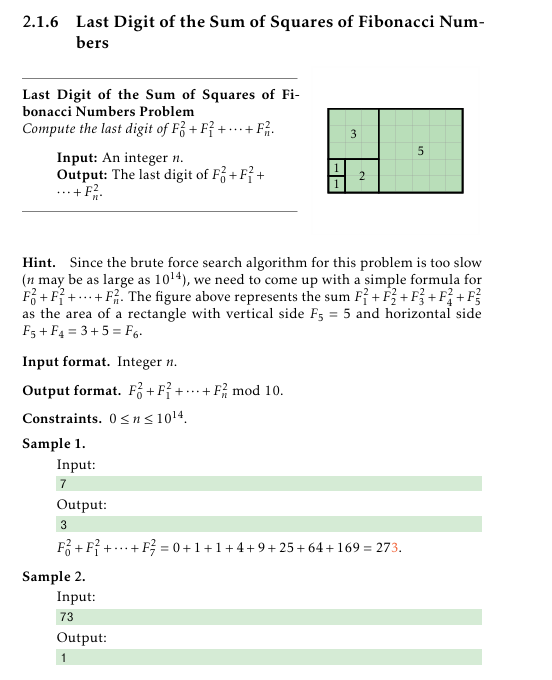
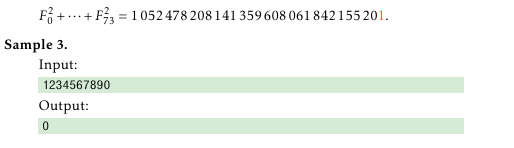

In [11]:
def fibonacci_mod(n, m):
    """Returns the n-th Fibonacci number modulo m using the Pisano period."""
    pisano_period = 60  # Pisano period for modulo 10
    
    # Reduce n modulo 60 to use the Pisano period
    n = n % pisano_period
    
    # Base cases
    if n == 0:
        return 0
    elif n == 1:
        return 1
    
    # Calculate the n-th Fibonacci number modulo m
    prev, curr = 0, 1
    for _ in range(2, n + 1):
        prev, curr = curr, (prev + curr) % m
    return curr

def last_digit_of_sum_of_squares(n):
    """Returns the last digit of the sum of squares of Fibonacci numbers F0^2 + F1^2 + ... + Fn^2."""
    # Fibonacci sum of squares formula: F0^2 + F1^2 + ... + Fn^2 = Fn * F(n+1)
    fibonacci_n = fibonacci_mod(n, 10)
    fibonacci_n_plus_1 = fibonacci_mod(n + 1, 10)
    return (fibonacci_n * fibonacci_n_plus_1) % 10

# Test cases
test_cases = [
    (7),    # Sample 1
    (73),   # Sample 2
    (1234567890),  # Sample 3
]

for n in test_cases:
    print(f"Last digit of the sum of squares of Fibonacci numbers up to F({n}): {last_digit_of_sum_of_squares(n)}")


Last digit of the sum of squares of Fibonacci numbers up to F(7): 3
Last digit of the sum of squares of Fibonacci numbers up to F(73): 1
Last digit of the sum of squares of Fibonacci numbers up to F(1234567890): 0


**Time Complexity:**

𝑂
(
1
)
for each test case, since Fibonacci numbers are computed using the Pisano period (which has a constant length of 60).

**Space Complexity:** 

𝑂
(
1
)
, as we only store a few variables for computation.

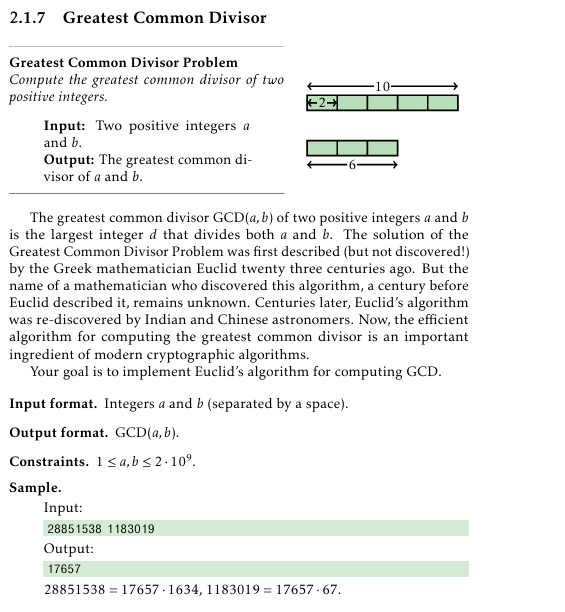

In [13]:
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

# Reading the input
a, b = 28851538, 1183019

# Output the result
print(gcd(a, b))


17657


**Time Complexity:**

𝑂
(
log
(
min
(
𝑎
,
𝑏
)
)
)
. The algorithm reduces the problem size at each step, making it efficient even for large values of 
𝑎
and 
𝑏
.

**Space Complexity:**

𝑂
(
1
)
, as the algorithm uses a constant amount of extra space.

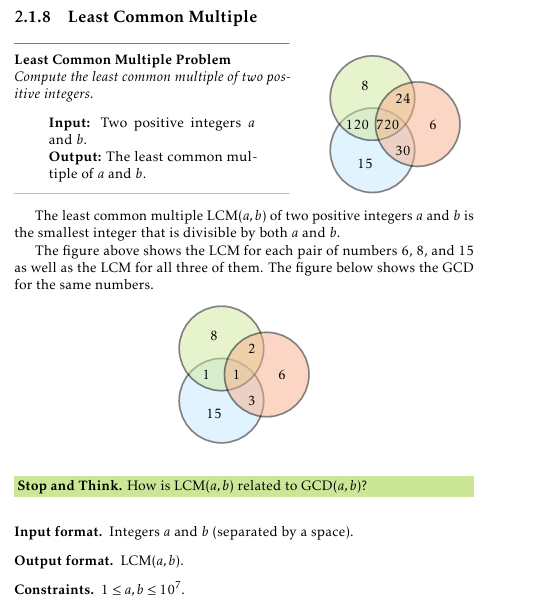
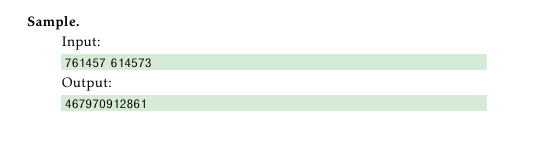

In [14]:
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

def lcm(a, b):
    return abs(a * b) // gcd(a, b)

# Reading the input
a, b = 761457, 614573

# Output the result
print(lcm(a, b))


467970912861


**Time Complexity:**

The GCD computation using Euclid’s algorithm has a time complexity of 
𝑂
(
log
(
min
(
𝑎
,
𝑏
)
)
)
.

The LCM calculation involves a single multiplication and division operation, which are constant time operations.
Therefore, the overall time complexity is 
𝑂
(
log
(
min
(
𝑎
,
𝑏
)
)
)
.

**Space Complexity:**

The space complexity is 
𝑂
(
1
)
because we only use a constant amount of space.

## Chat Explanation 
https://chatgpt.com/share/6754cde5-8fd4-8003-a9d0-f74743982905